In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
from pathlib import Path
from fastcore.all import *
from fastai.vision.all import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path2 = kagglehub.dataset_download("atulanandjha/lfwpeople")

path = Path('/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/')
destPath = Path('/kaggle/working/')
#! pip install -q datasets

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import shutil
import tarfile
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastcore.all import *
from fastai.vision.all import *
import timm

In [2]:
path = Path('/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/')
destPath = Path('/kaggle/working/')


In [3]:
tgz_path = '/kaggle/input/lfwpeople/lfw-funneled.tgz'
extract_dir = '/kaggle/working/lfwpeople/extracted'

In [4]:
if os.path.exists(tgz_path):
    with tarfile.open(tgz_path, 'r:gz') as tar:
        tar.extractall(path=extract_dir)
    print(f"Extracted files to {extract_dir}")
else:
    print(f"{tgz_path} not found.")


Extracted files to /kaggle/working/lfwpeople/extracted


In [5]:
celebrities = ['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman',
               'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio',
               'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr',
               'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks',
               'Will Smith', 'impostors']

for o in celebrities:
    dest = destPath / o
    dest.mkdir(exist_ok=True, parents=True)


In [6]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
).dataloaders(path, bs=32)


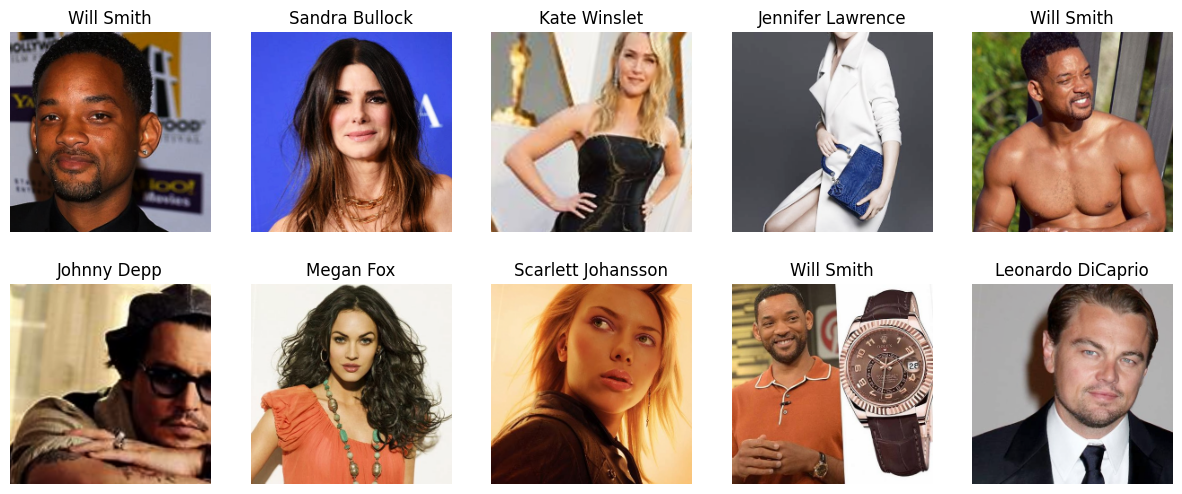

In [7]:
dls.show_batch(max_n=10, nrows=2)

In [8]:
learn = vision_learner(dls, 'vit_base_patch16_224', metrics=accuracy, pretrained=False)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.949309,3.259497,0.077778,18:03


epoch,train_loss,valid_loss,accuracy,time
0,3.643116,3.109345,0.080556,28:40
1,3.577947,3.009863,0.127778,25:01
2,3.497406,2.917694,0.091667,25:10
3,3.394623,2.730519,0.136111,25:27
4,3.293486,2.690919,0.125000,25:11


In [9]:
learn.export('face_recognition_model.pkl')

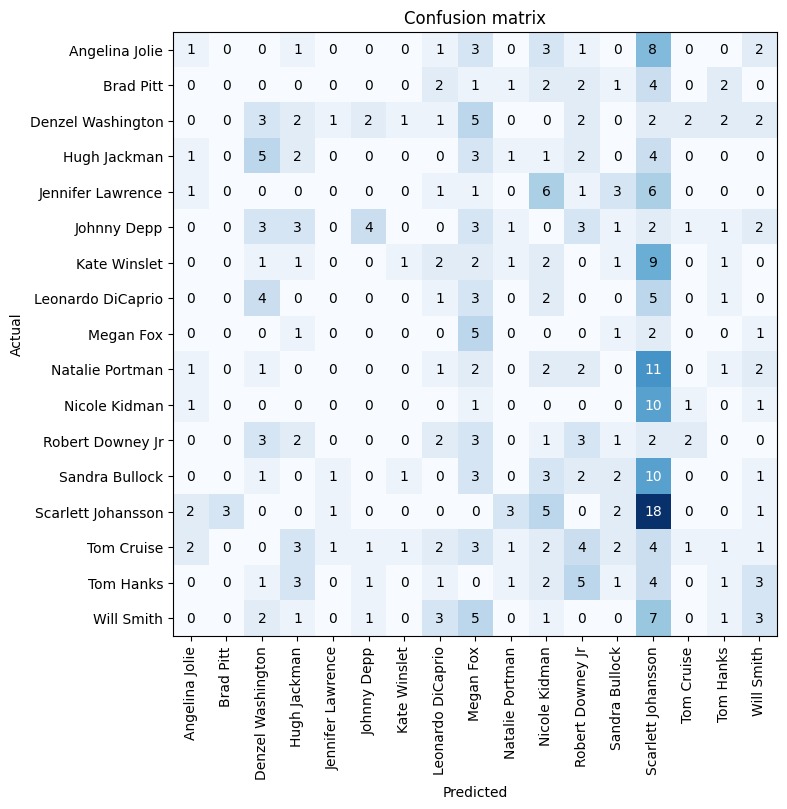

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

In [11]:
def visualize_features(learner, image_path):
    img = PILImage.create(image_path)
    pred, _, probs = learner.predict(img)
    print(f"Predicted: {pred}, Confidence: {probs.max().item()*100:.2f}%")

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Predicted: {pred}")
    plt.axis('off')
    plt.show()


Predicted: Megan Fox, Confidence: 42.06%


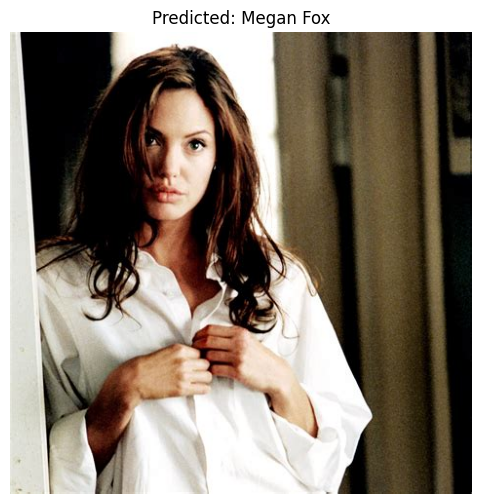

In [12]:
example_image = get_image_files(path)[0]
visualize_features(learn, example_image)
